<a href="https://colab.research.google.com/github/DestiniWright/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS6_224_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [7]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [8]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [9]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [10]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [11]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [12]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [13]:
df = pd.merge(income, lifespan)
df.shape

(40437, 4)

In [14]:
df = pd.merge(df, population)
df.shape

(40437, 5)

In [15]:
entities['world_6region'].value_counts()

europe_central_asia         77
america                     53
sub_saharan_africa          53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [16]:
entities['world_4region'].value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [17]:
entities_variables = ['country', 'name', 'world_6region']

entitiesnew = entities[entities_variables]

print(entitiesnew.shape)
entities.head()

(273, 3)


,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [18]:
merged = pd.merge(df, entities, left_on='geo', right_on='country')
print(merged.shape)
merged.head()

(40437, 38)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia


In [0]:
merged = merged.drop(['geo', 'country'], axis='columns')

In [20]:
merged.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,1800,603,28.21,3280000,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
1,1801,603,28.20,3280000,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
2,1802,603,28.19,3280000,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,1803,603,28.18,3280000,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
4,1804,603,28.17,3280000,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia


In [21]:
merged = merged.rename(columns = {
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
})

merged.head()

,year,income,lifespan,population,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,region
0,1800,603,28.21,3280000,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
1,1801,603,28.20,3280000,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
2,1802,603,28.19,3280000,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,1803,603,28.18,3280000,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
4,1804,603,28.17,3280000,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia


## Explore data

In [22]:
merged.dtypes

year                        int64
income                      int64
lifespan                  float64
population                  int64
alt_5                      object
alternative_1              object
alternative_2              object
alternative_3              object
alternative_4_cdiac        object
arb1                       object
arb2                       object
arb3                       object
arb4                       object
arb5                       object
arb6                       object
g77_and_oecd_countries     object
gapminder_list             object
god_id                     object
gwid                       object
income_groups              object
is--country                  bool
iso3166_1_alpha2           object
iso3166_1_alpha3           object
iso3166_1_numeric         float64
iso3166_2                  object
landlocked                 object
latitude                  float64
longitude                 float64
main_religion_2008         object
country       

In [23]:
merged.describe()

,year,income,lifespan,population,iso3166_1_numeric,latitude,longitude
count,40437.000000,40437.000000,40437.000000,4.043700e+04,40437.000000,40437.000000,40437.000000
mean,1909.292900,4619.492717,43.132080,1.371204e+07,428.344239,18.858941,20.249063
std,63.308682,10209.571045,16.313228,6.606335e+07,254.757425,24.045480,64.514436
min,1800.000000,247.000000,1.000000,2.128000e+03,4.000000,-42.000000,-175.000000
25%,1854.000000,876.000000,31.160000,4.113310e+05,204.000000,4.000000,-8.000000
50%,1909.000000,1442.000000,35.500000,1.985952e+06,418.000000,17.050000,21.750000
75%,1964.000000,3488.000000,55.970000,6.499707e+06,646.000000,39.760000,48.000000
max,2018.000000,177522.000000,84.170000,1.415046e+09,894.000000,65.000000,178.000000


In [24]:
merged.describe(exclude='number')

,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_2,landlocked,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,region
count,3942,11388,7008,5037,39248,4380,1752,876,657,438,438,40218,40437,40218,40437,40437,40437,40218,40437,0.0,40437,36714,40437,31536,40437,40218,39999,40437,40437
unique,18,52,32,23,180,20,8,4,3,2,2,3,187,186,187,4,1,186,187,0.0,2,3,187,144,1,186,185,4,6
top,JAPAN (EXCLUDING THE RUYUKU ISLANDS),Comores,St.Lucia,Venezuela (Bolivarian Republic of,Croatia,Korea DPR,FYR Macedonia,Republic of Korea,Korea North,"Korea, Dem. People's Rep.",Dem. Rep. Congo,g77,Croatia,TT,i23,high_income,True,TT,ISR,NaN,coastline,christian,Croatia,AUSTRIA,True,TT,AUSTRIA,africa,europe_central_asia
freq,219,219,219,219,219,219,219,219,219,219,219,27907,219,219,219,11216,40437,219,219,NaN,31630,24231,219,219,40437,219,219,11826,10778


In [25]:
merged.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [26]:
usa = merged[merged.country=='United States']
usa.head()

,year,income,lifespan,population,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,region
38028,1800,2127,39.41,6801854,U.S.,United States of America,USA,U.S.A.,United States Of America,NaN,NaN,NaN,NaN,NaN,NaN,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america
38029,1801,2167,39.41,6933517,U.S.,United States of America,USA,U.S.A.,United States Of America,NaN,NaN,NaN,NaN,NaN,NaN,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america
38030,1802,2202,39.41,7067728,U.S.,United States of America,USA,U.S.A.,United States Of America,NaN,NaN,NaN,NaN,NaN,NaN,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america
38031,1803,2166,39.41,7204538,U.S.,United States of America,USA,U.S.A.,United States Of America,NaN,NaN,NaN,NaN,NaN,NaN,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america
38032,1804,2165,39.41,7343995,U.S.,United States of America,USA,U.S.A.,United States Of America,NaN,NaN,NaN,NaN,NaN,NaN,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america


In [27]:
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,region
38046,1818,2258,39.41,9879049,U.S.,United States of America,USA,U.S.A.,United States Of America,NaN,NaN,NaN,NaN,NaN,NaN,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america
38146,1918,9371,47.18,106721812,U.S.,United States of America,USA,U.S.A.,United States Of America,NaN,NaN,NaN,NaN,NaN,NaN,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america
38246,2018,54898,79.14,326766748,U.S.,United States of America,USA,U.S.A.,United States Of America,NaN,NaN,NaN,NaN,NaN,NaN,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america


In [28]:
china = merged[merged.country=='China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,region
6854,1818,985,32.00,374161494,NaN,China (Mainland),"China, mainland",NaN,China (Mainland),NaN,NaN,NaN,NaN,NaN,NaN,g77,China,CN,i44,upper_middle_income,True,CN,CHN,156.0,NaN,coastline,35.0,105.0,eastern_religions,China,CHINA,True,CN,CHINA,asia,east_asia_pacific
6954,1918,989,22.13,462444535,NaN,China (Mainland),"China, mainland",NaN,China (Mainland),NaN,NaN,NaN,NaN,NaN,NaN,g77,China,CN,i44,upper_middle_income,True,CN,CHN,156.0,NaN,coastline,35.0,105.0,eastern_religions,China,CHINA,True,CN,CHINA,asia,east_asia_pacific
7054,2018,16018,76.92,1415045928,NaN,China (Mainland),"China, mainland",NaN,China (Mainland),NaN,NaN,NaN,NaN,NaN,NaN,g77,China,CN,i44,upper_middle_income,True,CN,CHN,156.0,NaN,coastline,35.0,105.0,eastern_religions,China,CHINA,True,CN,CHINA,asia,east_asia_pacific


## Plot visualization

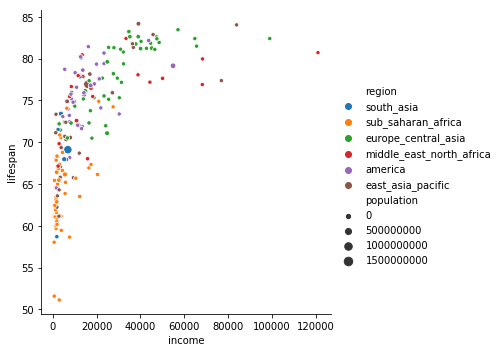

In [29]:
import seaborn as sns

now = merged[merged['year'] == 2018]

sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now);

In [30]:
qatar_now = now[(now.income > 80000) & (now.country == 'Qatar')].sort_values(by='income')
qatar_now

,year,income,lifespan,population,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,region
30362,2018,121033,80.71,2694849,NaN,NaN,NaN,NaN,Qatar,NaN,NaN,NaN,NaN,NaN,NaN,g77,Qatar,QA,i181,high_income,True,QA,QAT,634.0,NaN,coastline,25.27932,51.52245,muslim,Qatar,QATAR,True,QA,QATAR,asia,middle_east_north_africa


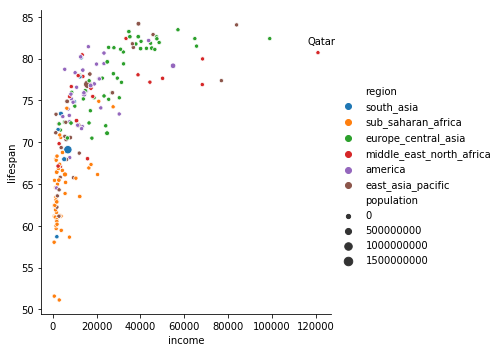

In [31]:


sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now);
plt.text(x=qatar_now.income-5000 , y=qatar_now.lifespan+1 , s='Qatar');

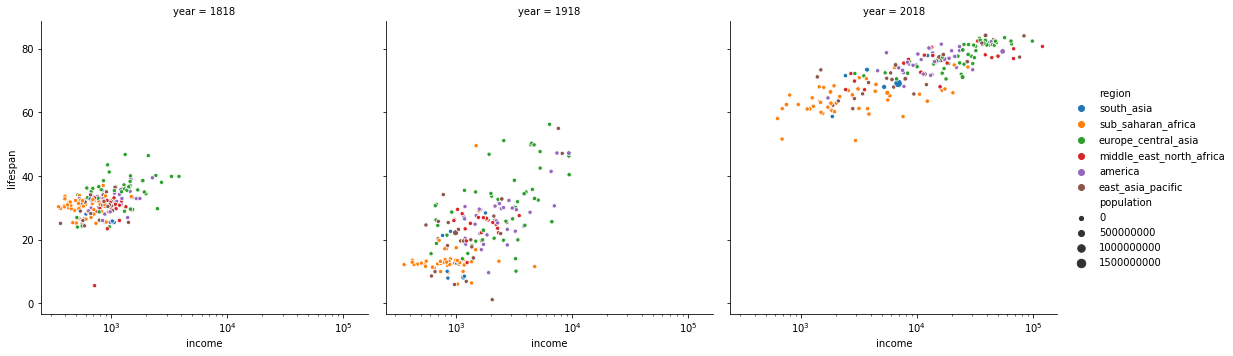

In [32]:
years = [1818, 1918, 2018]

centuries = merged[merged.year.isin(years)]

sns.relplot(x='income', y='lifespan', hue='region', size='population', col='year', data=centuries);
plt.xscale('log');

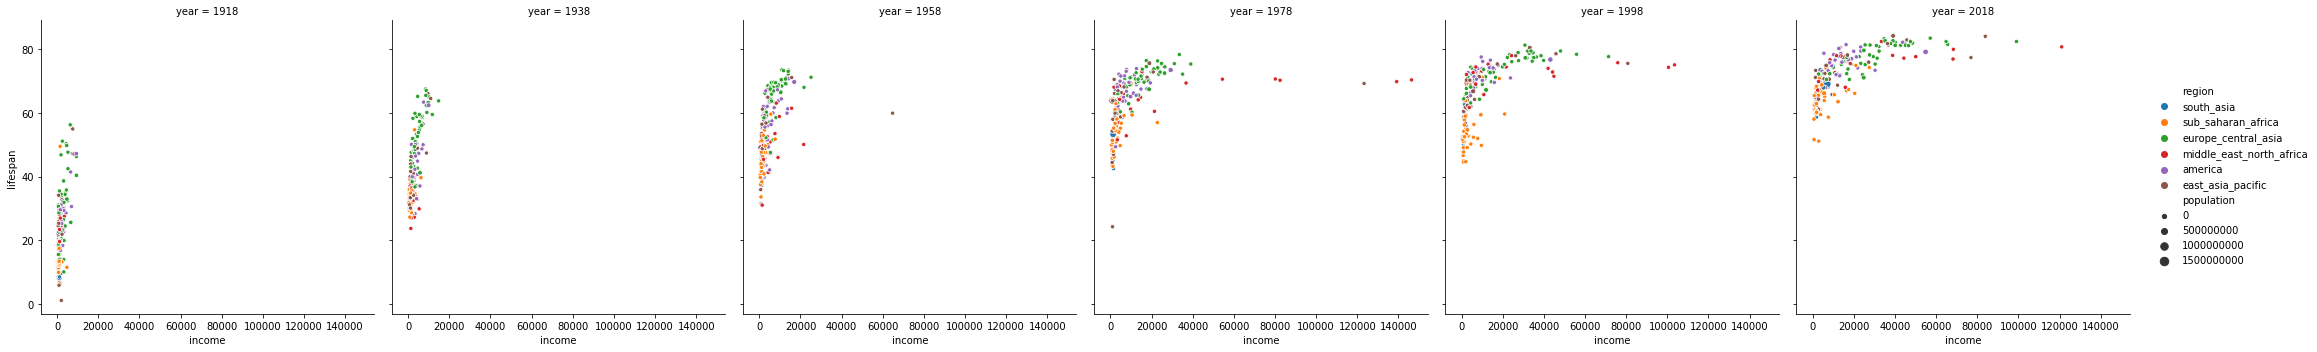

In [33]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

decades = merged[merged.year.isin(years)]

sns.relplot(x='income', y='lifespan', hue='region', size='population', col='year', data=decades);

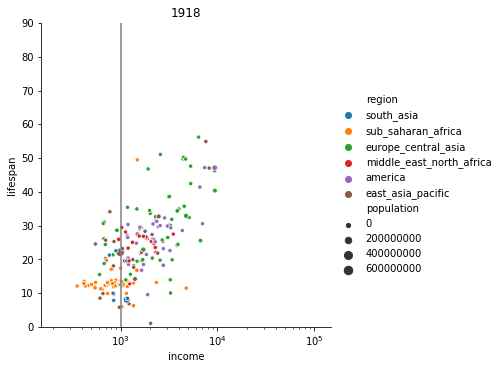

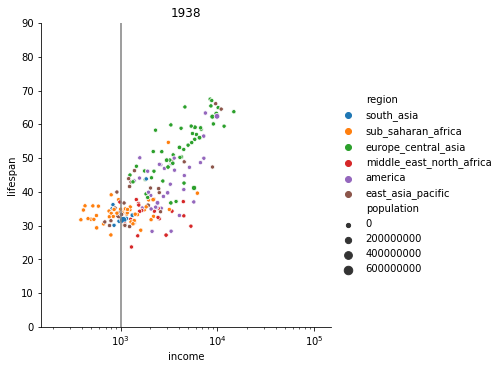

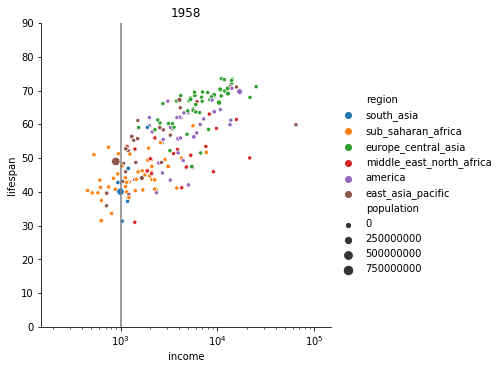

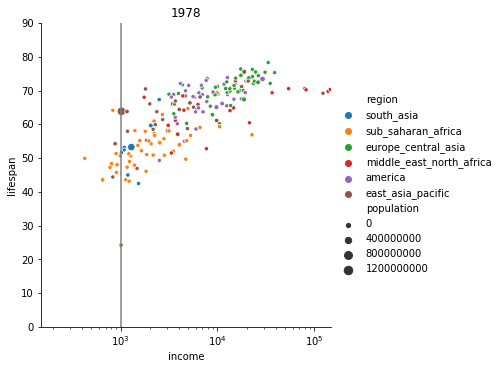

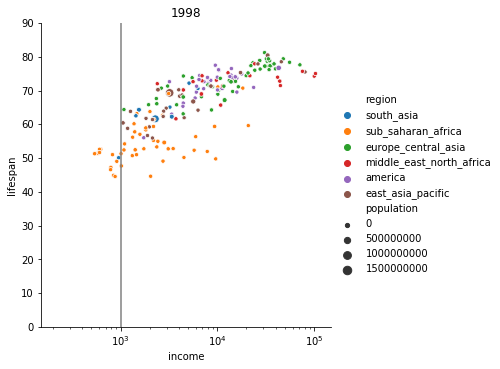

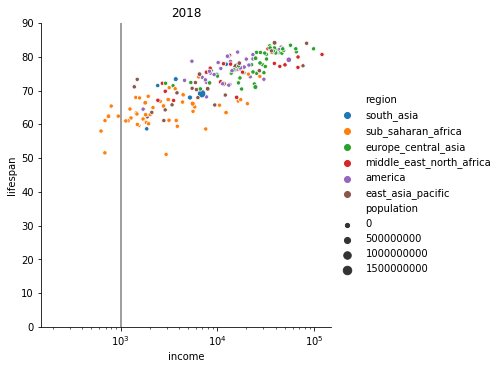

In [34]:
for year in years:
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=merged[merged.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((0, 90))
    plt.title(year)
    plt.axvline(x=1000, color='grey')

In [35]:
merged[(merged.year==1918) & (merged.lifespan > 50)]

,year,income,lifespan,population,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,region
1698,1918,7610,54.95,5066003,NaN,NaN,NaN,NaN,Australia,NaN,NaN,NaN,NaN,NaN,NaN,oecd,Australia,AU,i13,high_income,True,AU,AUS,36.0,NaN,coastline,-25.0,135.0,christian,Australia,AUSTRALIA,True,AU,AUSTRALIA,asia,east_asia_pacific
10067,1918,6393,56.24,3165276,NaN,NaN,NaN,NaN,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,oecd,Denmark,DK,i59,high_income,True,DK,DNK,208.0,NaN,coastline,56.0,10.0,christian,Denmark,DENMARK,True,DK,DENMARK,europe,europe_central_asia
17513,1918,2576,51.11,115504,NaN,NaN,NaN,NaN,Iceland,NaN,NaN,NaN,NaN,NaN,NaN,oecd,Iceland,IS,i100,high_income,True,IS,ISL,352.0,NaN,coastline,65.0,-18.0,christian,Iceland,NaN,True,IS,ICELAND,europe,europe_central_asia
27196,1918,4479,50.28,2576646,NaN,NaN,NaN,NaN,Norway,NaN,NaN,NaN,NaN,NaN,NaN,oecd,Norway,NO,i168,high_income,True,NO,NOR,578.0,NaN,coastline,62.0,10.0,christian,Norway,NORWAY,True,NO,NORWAY,europe,europe_central_asia


In [36]:
merged[(merged.year==2018) & (merged.lifespan < 50)]

,year,income,lifespan,population,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,region


## Analyze outliers

## Plot multiple years

## Point out a story

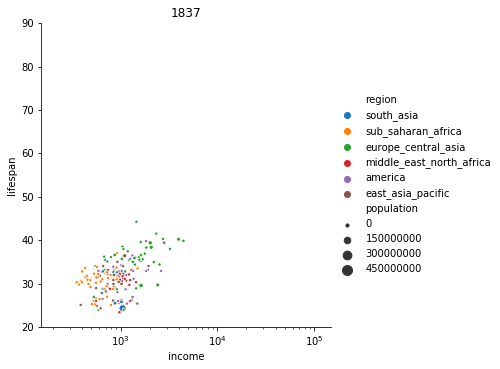

In [37]:
year = 1837 #@param {type:"slider", min:1800, max:2018, step:1}

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            data=merged[merged.year==year], sizes = (10, 100))

plt.xscale('log')
plt.xlim((150, 150000))
plt.ylim((20, 90))
plt.title(year);

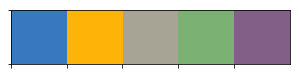

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

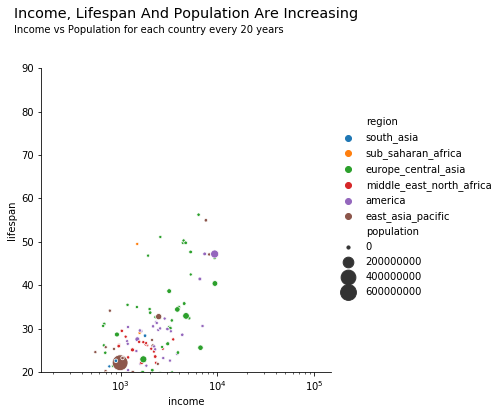

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

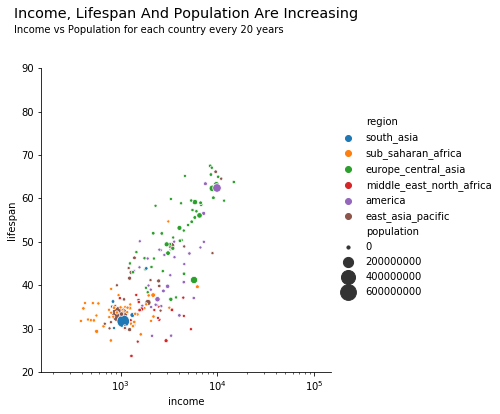

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

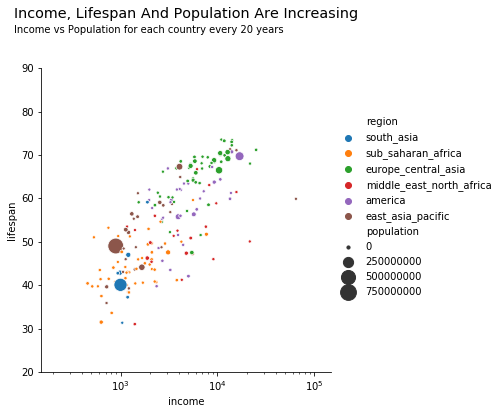

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

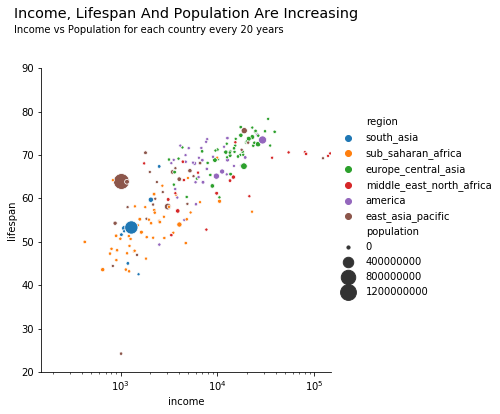

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

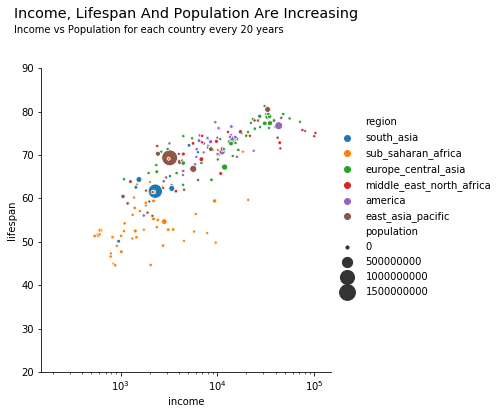

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

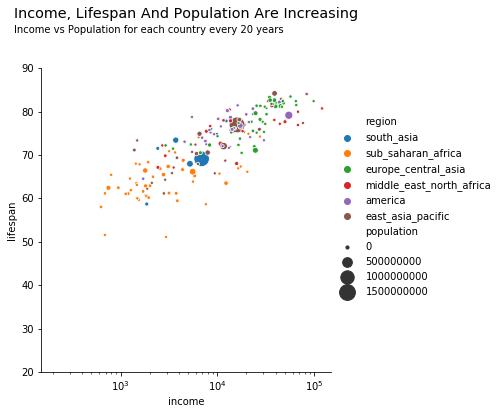

<IPython.core.display.Javascript object>

In [38]:
# Based on the example at: 
# https://colab.research.google.com/notebooks/widgets.ipynb#scrollTo=BZa2t-U5gIAB

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors));

from google.colab import widgets
tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=merged[merged.year==year], sizes = (10, 250))

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90));
    
    plt.title(
        'Income, Lifespan And Population Are Increasing', 
        pad = 50, size = 'x-large')
    plt.text(x = 80, y = 98, ha = 'left',
             s = 'Income vs Population for each country every 20 years')

In [39]:
entities['world_4region'].value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [40]:
entities_var =  ['country', 'name', 'world_4region']
entities2 = entities[entities_var]

fourRegMerge = pd.merge(df, entities2, left_on='geo', right_on='country')
print(fourRegMerge.shape)
fourRegMerge.head()

(40437, 8)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia


In [41]:
fourRegMerge = fourRegMerge.drop(['geo', 'country'], axis='columns')
fourRegMerge = fourRegMerge.rename(columns = {
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_4region': 'region'
})

fourRegMerge.head()

,year,income,lifespan,population,country,region
0,1800,603,28.21,3280000,Afghanistan,asia
1,1801,603,28.20,3280000,Afghanistan,asia
2,1802,603,28.19,3280000,Afghanistan,asia
3,1803,603,28.18,3280000,Afghanistan,asia
4,1804,603,28.17,3280000,Afghanistan,asia


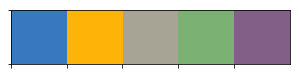

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

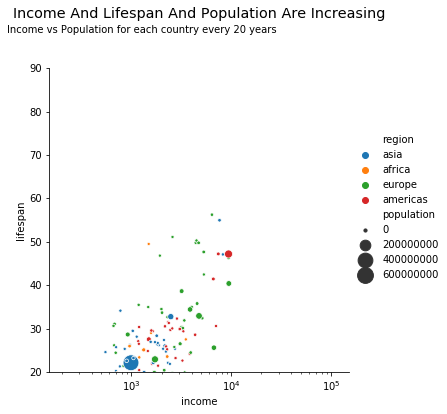

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

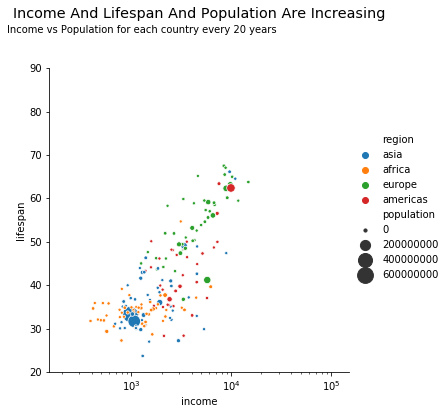

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

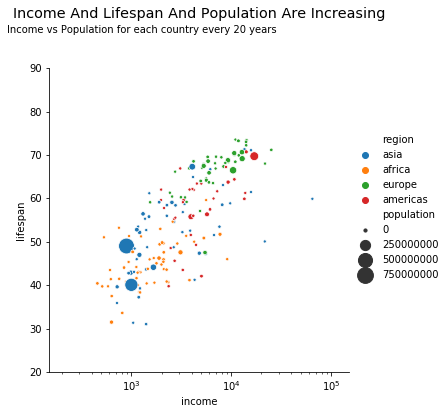

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

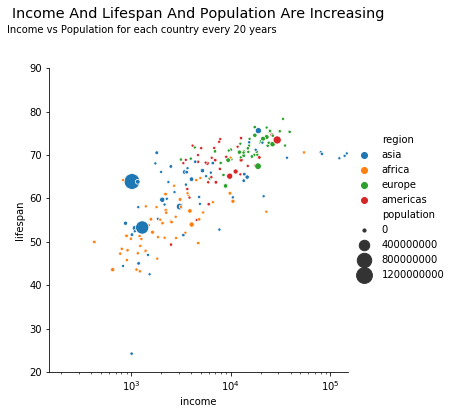

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

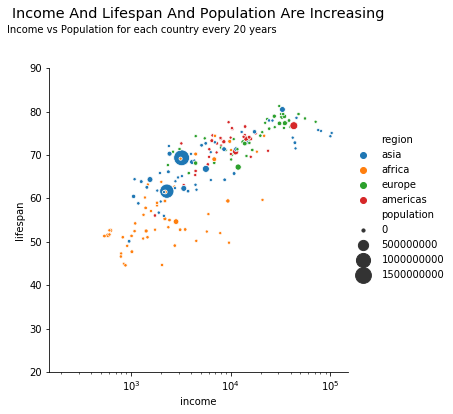

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

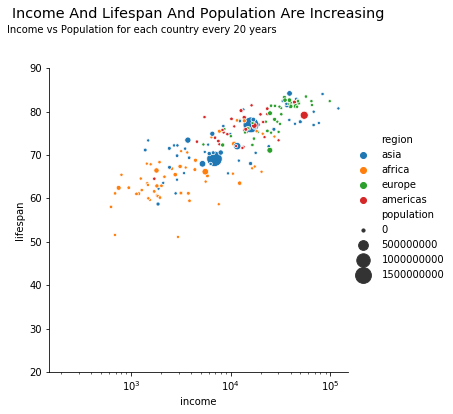

<IPython.core.display.Javascript object>

In [42]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors));

tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=fourRegMerge[fourRegMerge.year==year], sizes = (10, 250))

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90));
    
    plt.title(
        'Income And Lifespan And Population Are Increasing', 
        pad = 50, size = 'x-large')
    plt.text(x = 57, y = 98, 
             s = 'Income vs Population for each country every 20 years')

# ASSIGNMENT
Replicate the lesson code

- Improve the Gapminder graph that we made during lecture
- Add a title and subtitle to the graph
- (optional) see how the graph looks using the 4 regions rather than the 6.
- (stretch) Small tick marks 
- color hues

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project